<a href="https://colab.research.google.com/github/bcataldo3/plantilla_curso_python/blob/main/docs/Clase_05 - R - Modelo K-Medias Metricas Evaluacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo K-medias - Métricas de Evaluación
Para comenzar esta clase, debemos volver a calcular algunos componentes de la clase anterior.

In [1]:
# Cargar librerías
library(dplyr)
library(ggplot2)
library(cluster)
library(Rtsne)

# Cargar datos desde Google Drive
url <- "https://drive.google.com/uc?id=1LG6hb0duLtnSiFhT9JWFNuo8qDxHV08W"
data <- read.csv(url, header = FALSE)

# Definir los nombres de las columnas (asegúrate de que coincidan con tu dataset de Python)
names(data) <- c('id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst')


# Preparar los datos (asegúrate de que las columnas coincidan con tu dataset de Python)
cdf <- select(data, -diagnosis)

# Aplicar t-SNE
set.seed(1000)
tsne_data <- Rtsne(data, dims = 2, perplexity = 10)
tsne_data_frame <- data.frame(x = tsne_data$Y[,1], y = tsne_data$Y[,2])

# Unir los datos t-SNE con el dataframe original
data_tsne <- cbind(data, tsne_data_frame)

## Coeficiente de Silhouette
El método más común para evaluar el rendimiento de un algoritmo de agrupamiento sin conocimiento de la verdad fundamental es el coeficiente de Silhouette. Proporciona tanto un índice por muestra como una representación gráfica global que muestra el nivel de coherencia interna y separación de los grupos. Para calcular el puntaje, necesitamos introducir dos medidas auxiliares. La primera es la distancia intra-grupo promedio de una muestra $x_i ∈ K_j$ asumiendo la cardinalidad de $|K_j|=n(j)$:

$$ a(x_i)=\frac{1}{n(j)}\sum_{x_t \in K_j} d(x_i,x_t) $$

Por supuesto, $d(•)$ debe ser la misma función de distancia empleada en el procedimiento de agrupamiento. Dada una muestra $x_i ∈ K_j$, vamos a denotar el grupo más cercano como $K_c$. De esta manera, también podemos definir la distancia más pequeña al grupo más cercano (como la distancia promedio al grupo más cercano)

$$ b(x_i)=\frac{1}{n(c)}\sum_{x_t \in K_c} d(x_i,x_t) $$

Con estas dos medidas, podemos definir el coeficiente de Silhouette para cada $x_i \in X$

$$ s(x_i)=\frac{b(x_i)-a(x_i)}{\max\{a(x_i),b(x_i)\}}$$

El puntaje $s(•) ∈ (-1, 1)$. Cuando $s(•) → -1$, significa que $b(•) << a(•)$, por lo tanto, la muestra $x_i ∈ K_j$ está más cerca del grupo más cercano $K_c$ que de las otras muestras asignadas a $K_j$. Esta condición indica una asignación incorrecta. Por otro lado, cuando $s(•) → 1$, $b(•) >> a(•)$, por lo que la muestra $x_i$ está mucho más cerca de sus vecinos (pertenecientes al mismo grupo) que de cualquier otro punto asignado al grupo más cercano. Claramente, esta es una condición óptima y la referencia a emplear al ajustar un algoritmo. Sin embargo, como este índice no es global, es útil introducir gráficos de Silhouette, que muestran los puntajes obtenidos por cada muestra, agrupados por grupo y ordenados de manera descendente. Consideremos gráficos de Silhouette para el conjunto de datos de cancer de pecho para $K={2, 4, 6, 8}$

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


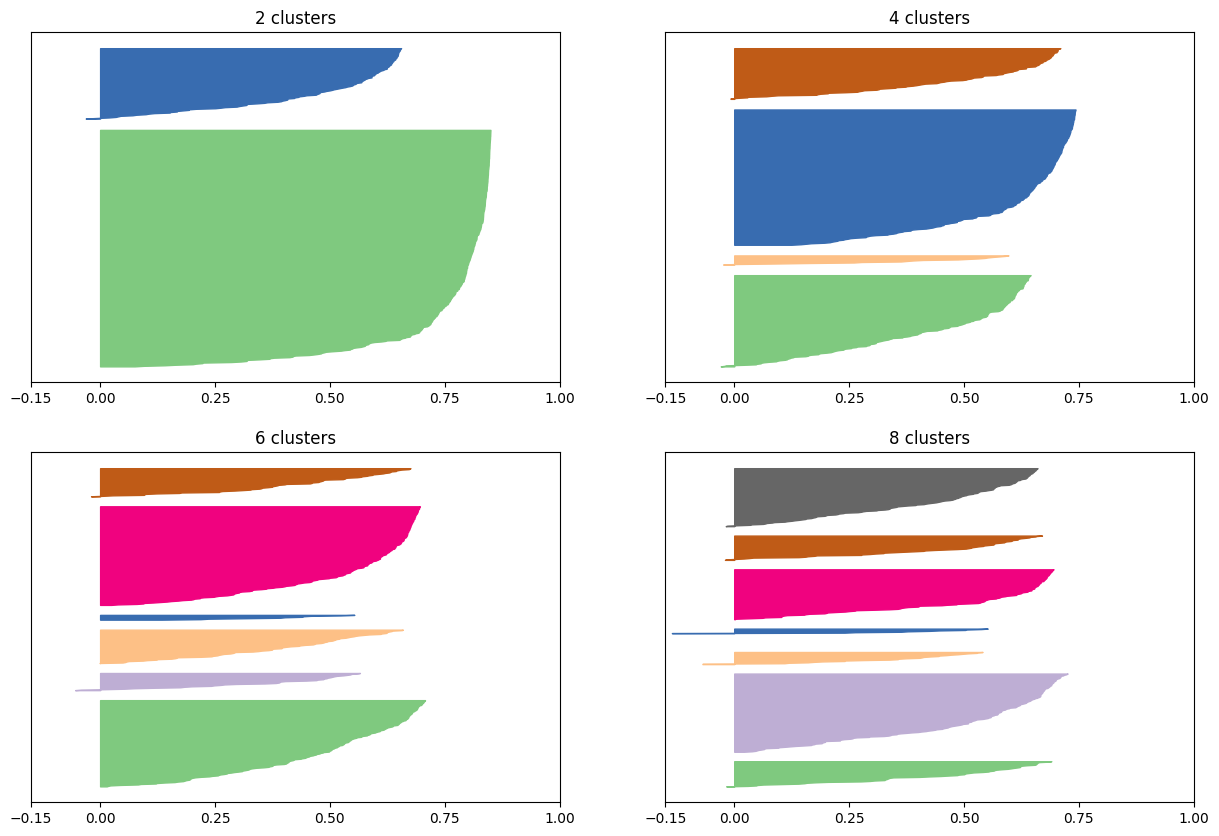

In [2]:
# Cargar librerías
library(factoextra)
library(cluster)

# Definir el número de clusters
nb_clusters <- c(2, 4, 6, 8)

# Crear un layout para múltiples gráficos
par(mfrow=c(2,2))

# Bucle para calcular K-Means y graficar los resultados de silhouette para cada número de cluster
for (n in nb_clusters) {
  # K-Means clustering
  set.seed(1000)
  km.res <- kmeans(cdf, centers = n, nstart = 25)
  
  # Silhouette plot
  silhouette <- silhouette(km.res$cluster, dist(cdf))
  plot(silhouette, border = NA, main = paste(n, "clusters"), col = rainbow(n)[km.res$cluster])
}

El primer diagrama muestra el agrupamiento natural con K=2. La primera silueta es muy marcada, lo que indica que la distancia inter-grupo promedio tiene una gran variación. Además, un grupo tiene muchas más asignaciones que el otro (aunque es menos marcado). A partir de la descripción del conjunto de datos, sabemos que las dos clases están desequilibradas (357 benignas frente a 212 malignas), por lo tanto, la asimetría está parcialmente justificada. Sin embargo, en general, cuando los conjuntos de datos están equilibrados, un buen gráfico de silueta se caracteriza por tener grupos homogéneos con una silueta redondeada que debería estar cerca de 1.0. De hecho, cuando la forma es similar a un cigarro largo, significa que las distancias intra-grupo están muy cerca de su promedio (alta cohesión) y hay una clara separación entre los grupos adyacentes. Para K=2, tenemos puntajes razonables, ya que el primer grupo alcanza 0.6, mientras que el segundo tiene un pico correspondiente a alrededor de 0.8. Sin embargo, aunque en este último la mayoría de las muestras se caracterizan por tener s(•) > 0.75, en el primero, aproximadamente la mitad de las muestras están por debajo de 0.5. Este análisis muestra que el grupo más grande es más homogéneo y es más fácil para K-medias asignar las muestras (es decir, en términos de medidas, la varianza de $x_i ∈ K_2$ es menor y, en el espacio de alta dimensión, la esfera que representa a $K_2$ es más uniforme que la que representa a $K_1$)

Los demás gráficos muestran escenarios similares porque se ha detectado un grupo muy cohesivo junto con algunos grupos agudos. Esto significa que hay una discrepancia de anchura muy consistente. Sin embargo, al aumentar K, obtenemos grupos ligeramente más homogéneos porque tiende a ser similar el número de muestras asignadas. La presencia de un grupo muy redondeado (casi rectangular) con s(•) > 0.75 confirma que el conjunto de datos contiene al menos un grupo de muestras muy cohesivas, cuyas distancias con respecto a cualquier otro punto asignado a otros grupos son bastante cercanas. Sabemos que la clase maligna (aunque su cardinalidad sea mayor) es más compacta, mientras que la benigna se extiende sobre un subespacio mucho más amplio; por lo tanto, podemos asumir que para todos los K, el grupo más redondeado está compuesto por muestras malignas y todos los demás se pueden distinguir según su nitidez. Por ejemplo, para K=8, es muy probable que el tercer grupo corresponda a la parte central del segundo grupo en el primer gráfico, mientras que los más pequeños contienen muestras que pertenecen a regiones aisladas del subconjunto benigno.

Si no conocemos la verdad fundamental, deberíamos considerar tanto K=2 como K=8 (o incluso un número mayor). De hecho, en el primer caso, probablemente estemos perdiendo muchos detalles finos de información, pero estamos determinando una subdivisión sólida (asumiendo que un grupo no es extremadamente cohesivo debido a la naturaleza del problema). Por otro lado, con K>8, los grupos son obviamente más pequeños, con una cohesión moderadamente mayor, y representan subgrupos que comparten algunas características comunes. Como discutimos en la sección anterior, la elección final depende de muchos factores y estas herramientas solo pueden proporcionar una indicación general. Además, cuando los grupos no son convexos o su varianza no está distribuida uniformemente entre todas las características, K-medias siempre dará rendimientos subóptimos porque los grupos resultantes incorporarán un espacio grande vacío. Sin direcciones específicas, el número óptimo de grupos está asociado con un gráfico que contiene gráficos redondeados homogéneos (con aproximadamente el mismo ancho). Si la forma permanece afilada para cualquier valor de K, significa que la geometría no es completamente compatible con medidas simétricas (por ejemplo, los grupos están muy estirados) y se deben considerar otros métodos.


### Índice de Completitud
Esta medida (junto con todas las demás discutidas a partir de ahora) se basa en el conocimiento de la verdad fundamental. Antes de introducir el índice, es útil definir algunos valores comunes. Si denotamos con $Y_{true}$ al conjunto que contiene las asignaciones verdaderas y con $Y_{pred}$ al conjunto de predicciones (ambos conteniendo $M$ valores y $K$ grupos), podemos estimar las siguientes probabilidades. $n_{true}(k)$ y $n_{pred}(k)$ representa el número de muestras verdaderas/predichas que pertenecen al grupo $k ∈ K$. En este punto, podemos calcular las entropías de $Y_{true}$ y $Y_{pred}$.

$\large p(y_{true}=k \in K)=\frac{n_{true}(k)}{M}$

$\large p(y_{pred}=k \in K)=\frac{n_{pred}(k)}{M}$

$\large H(Y_{true})=-\sum_{k}\frac{n_{true}(k)}{M}\log(\frac{n_{true}(k)}{M})$

$\large H(Y_{pred})=-\sum_{k}\frac{n_{pred}(k)}{M}\log(\frac{n_{pred}(k)}{M})$

Considerando la definición de entropía, $H(•)$ se maximiza con una distribución uniforme, la cual, a su vez, corresponde a la máxima incertidumbre de cada asignación. Para nuestros propósitos, también es necesario introducir las entropías condicionales (que representan la incertidumbre de una distribución dada el conocimiento de otra) de $Y_{true}$ dado $Y_{pred}$ y viceversa.

$\large H(Y_{true}|Y_{pred})=-\sum_{i}\sum_{j}\frac{n(i,j)}{M}\log(\frac{n(i,j)}{n_{pred}(j)})$

$\large H(Y_{pred}|Y_{true})=-\sum_{i}\sum_{j}\frac{n(i,j)}{M}\log(\frac{n(i,j)}{n_{true}(i)})$

Donde la función $n(i,j)$ representa, en la primera ecuación, el número de muestras con la etiqueta verdadera de $i$ asignadas al grupo $K_j$. En la segunda ecuación, $n(i,j)$ representa el número de muestras con la etiqueta verdadera de $j$ asignadas al grupo $K_i$.

Finalmente, el índice de completitud se define como.

$$\large c=1-\frac{H(Y_{pred}|Y_{true})}{H(Y_{true})}$$

Cuando $H(Y_{pred}|Y_{true}) → 0$, el conocimiento de $Y_{true}$ reduce la incertidumbre de las predicciones y, por lo tanto, c → 1. Esto es equivalente a decir que todas las muestras con la misma etiqueta verdadera se asignan al mismo grupo. Por el contrario, cuando $H(Y_{pred}|Y_{true} → H(Y_{pred}$, significa que la verdad fundamental no proporciona ninguna información que reduzca la incertidumbre de las predicciones y $c → 0$.

Por supuesto, un buen agrupamiento se caracteriza por $c → 1$. En el caso del conjunto de datos de cáncer de mama de Wisconsin, el puntaje de completitud, calculado utilizando la función ```completenss_score()``` de ```scikit-learn``` (que también funciona con etiquetas de texto) y $K=2$ (la única configuración asociada con la verdad fundamental), es de 0.517. Este resultado confirma que, para $K=2$, K-medias no puede separar perfectamente los grupos, porque, como hemos visto, hay algunas muestras malignas que se asignan erróneamente al grupo que contiene la gran mayoría de las muestras benignas. Sin embargo, como $c$ no es extremadamente pequeña, podemos estar seguros de que la mayoría de las muestras para ambas clases han sido asignadas a diferentes grupos. Como se menciona anteriormente, dada la geometría de los datos es recomendable explorar otros métodos de agrupación.

### Índice de Homogeneidad
El indice de homogeneidad es complementario al anterior y se basa en la suposición de que un grupo debe contener solo muestras que tengan la misma etiqueta verdadera. Se define como:

$$c=1-\frac{H(Y_{true}|Y_{pred})}{H(Y_{true})}$$

Similarmente al indice de completitud, cuando $H(Y_{true}|Y_{pred}) → H(Y_{true})$, significa que las asignaciones no tienen impacto en la entropía condicional, por lo tanto, la incertidumbre no se reduce después del agrupamiento (por ejemplo, cada grupo contiene muestras pertenecientes a todas las clases) y $h → 0$. Por el contrario, cuando $H(Ytrue|Ypred) → 0$, $h → 1$, porque el conocimiento de las predicciones ha reducido la incertidumbre sobre las asignaciones verdaderas y los grupos contienen casi exclusivamente muestras con la misma etiqueta. Es importante recordar que este indice por sí solo no es suficiente, porque no garantiza que un grupo contenga todas las muestras $x_i ∈ X$ con la misma etiqueta verdadera. Por eso, el indice de homogeneidad siempre se evalúa junto con el indice de completitud.

El resultado del test es de 0.422. Este valor (especialmente para $K=2$) confirma nuestro análisis inicial. Al menos un grupo (el que contiene la mayoría de las muestras benignas) no es completamente homogéneo, ya que contiene muestras pertenecientes a ambas clases. Sin embargo, como el valor no está muy cerca de 0, podemos estar seguros de que las asignaciones son parcialmente correctas. Considerando ambos valores, $h$ y $c$, podemos deducir que K-medias no está funcionando extremadamente bien (probablemente debido a la no convexidad), pero al mismo tiempo, es capaz de separar correctamente todas esas muestras cuya distancia al grupo más cercano está por encima de un umbral específico.

Es evidente que, con conocimiento de la verdad fundamental, no podemos aceptar fácilmente los resultados de K-medias y deberíamos buscar otro algoritmo que pueda proporcionar tanto $h$ como $c → 1$, es decir, que logre una alta homogeneidad y completitud en la asignación de las muestras a los grupos.

### Un Equilibrio entre Homogeneidad y Completitud utilizando la Medida V

El lector familiarizado con el aprendizaje supervisado debería conocer el concepto de puntuación $F$ (o medida $F$), que es la media armónica de precisión y recall. El mismo tipo de compensación puede ser empleado también al evaluar resultados de agrupamiento dados la verdad fundamental. De hecho, en muchos casos, es útil tener una única medida que tenga en cuenta tanto la homogeneidad como la completitud. Tal resultado se puede lograr fácilmente utilizando la medida $V$ (o puntuación $V$), que se define como.

$$V = \frac{2}{\frac{1}{Homogeneidad}+\frac{1}{Completitud}} = \frac{2\cdot Homogeneidad \cdot Completitud}{Homogeneidad+Completitud}$$

Para nuestro caso, el valor del índice es de 0.465. Como se esperaba, la puntuación V es una medida promedio que, en este caso, se ve negativamente influenciada por una homogeneidad más baja. Por supuesto, este índice no proporciona ninguna información diferente, por lo tanto, solo es útil para sintetizar la completitud y la homogeneidad en un único valor. Sin embargo, con algunas manipulaciones matemáticas simples pero tediosas, es posible demostrar que la medida V también es simétrica (es decir, $V(Y_{pred}|Y_{true}) = V(Y_{true}|Y_{pred}))$; por lo tanto, dadas dos asignaciones independientes Y_1 e Y_2, $V(Y_1|Y_2)$ es una medida de acuerdo entre ellas. Tal escenario no es extremadamente común, porque otras medidas pueden lograr un mejor resultado. Sin embargo, este puntaje podría ser utilizado, por ejemplo, para verificar si dos algoritmos (posiblemente basados en estrategias diferentes) tienden a producir las mismas asignaciones o si son discordantes. En este último caso, incluso si la verdad fundamental es desconocida, el científico de datos puede comprender que una estrategia seguramente no es tan efectiva como la otra y comenzar un proceso de exploración para encontrar el algoritmo de agrupamiento óptimo.

### Índice de Información Mutua Ajustada

El objetivo principal de este puntaje es evaluar el nivel de acuerdo entre $Y_{true}$ e $Y_{pred}$ sin tener en cuenta las permutaciones. Dicho objetivo se puede medir empleando el concepto de Información Mutua ($MI$) de la teoría de la información; en nuestro caso, se define como:

$$MI(Y_{pred};Y_{true})=\sum_{i}\sum_{j}\frac{n(i,j)}{M}\log(\frac{M \cdot n(i,j)}{n_{true}(i)\cdot n_{pred}(j)})$$

Las funciones son las mismas que se definieron previamente. Cuando $MI → 0$, entonces $n(i,j) \rightarrow n_{true}(i) n_{pred}(j)$, y estos terminos son proporcionales respectivamente a $p(i,j)$ y $p_{true}(i)p_{pred}(j)$. Por lo tanto, esta condición es equivalente a decir que $Y_{true}$ e $Y_{pred}$ son estadísticamente independientes y no hay acuerdo. Por otro lado, con algunas manipulaciones simples, podemos reescribir $MI$ como:

$MI(Y_{true},Y_{pred})=−H(Y_{pred}∣Y_{true}) + H(Y_{pred})$

Por lo tanto, como  $H(Ypred∣Ytrue)≤H(Ypred)$, cuando el conocimiento de la verdad fundamental reduce la incertidumbre sobre Ypred, se sigue que $H(Ypred∣Ytrue)→0$ y se maximiza $MI$. Para nuestros propósitos, es preferible considerar una versión normalizada (limitada entre 0 y 1) que también esté ajustada para el azar (es decir, considerando la posibilidad de que una asignación verdadera sea debida al azar). El índice $AMI$, cuya derivación completa no es trivial y está más allá del alcance de este libro, se define como:

$$AMI(Y_{pred};Y_{true})=\frac{MI(Y_{pred};Y_{true}) - \mathbb{E}[MI(Y_{pred};Y_{true})]}{mean (H(Y_{true}),H(Y_{pred}))- \mathbb{E}[MI(Y_{pred};Y_{true})]}$$


Este valor es igual a 0 en el caso de ausencia total de acuerdo y es igual a 1 cuando Ytrue e Ypred están completamente de acuerdo (también en presencia de permutaciones). Para el conjunto de datos Breast Cancer Wisconsin y $K=2$, obtenemos un índice de 0.421. El acuerdo es moderado y compatible con la otra medida. Asumiendo la presencia de permutaciones y la posibilidad de asignaciones al azar, $Y_{true}$ e $Y_{pred}$ comparten un nivel medio de información porque, como hemos discutido, K-means es capaz de asignar correctamente todas las muestras donde la probabilidad de superposición es insignificante, mientras tiende a considerar como benignas muchas muestras malignas que se encuentran en el límite entre los dos grupos (por otro lado, no realiza asignaciones incorrectas para las muestras benignas). Sin ninguna indicación adicional, este índice también sugiere verificar otros algoritmos de agrupamiento que puedan manejar grupos no convexos, porque la falta de información compartida se debe principalmente a la imposibilidad de capturar geometrías complejas usando bolas estándar (en particular en el subespacio donde la superposición es más significativa).

### Índice de Rand Ajustado

El índice de Rand ajustado es una medida de discrepancia entre la distribución de etiquetas verdaderas y la predicha. Para calcularlo, es necesario definir ciertas cantidades de la siguiente manera:

* $a$: Representa el número de pares de muestras $(x_i, x_j)$ con las mismas etiquetas verdaderas $(y_i, y_j)$ : $y_i = y_j$ y asignadas al mismo grupo $K_c$.
* $b$: Representa el número de pares de muestras $(x_i, x_j)$ con diferentes etiquetas verdaderas $(y_i, y_j)$ : $y_i ≠ y_j$ y asignadas a diferentes grupos $K_c$ y $K_d$ con $c ≠ d$.

Si hay $M$ valores, el número total de combinaciones binarias se obtiene utilizando el coeficiente binomial con $k=2$, por lo tanto, una medida inicial de discrepancia es:

$$R=\frac{a+b}{\binom{M}{2}}$$

Obviamente, este valor puede ser dominado ya sea por $a$ o por $b$. En ambos casos, un puntaje más alto indica que las asignaciones están de acuerdo con la verdad fundamental. Sin embargo, tanto $a$ como $b$ pueden estar sesgados por asignaciones al azar. Por eso se introdujo el puntaje de Rand ajustado. La fórmula actualizada es:

$$R_A=\frac{R-\mathbb{E}[R]}{\max{R}-R}$$

Este valor está limitado entre -1 y 1. Cuando el puntaje de Rand ajustado tiende a -1, es decir $R_A → -1$, tanto $a$ como $b$ son muy pequeños y la gran mayoría de las asignaciones son incorrectas. Por otro lado, cuando  $R_A → 1$, la distribución predicha está muy cerca de la verdad fundamental. Para el conjunto de datos Breast Cancer Wisconsin y $K=2$, obtenemos 0.491. Este resultado es mejor que los otros índices, ya que el valor es mayor que -1 (extremo negativo). Confirma que la discrepancia entre las distribuciones no es muy pronunciada y se debe principalmente a un subconjunto limitado de muestras. Este puntaje es muy confiable y también se puede utilizar como una métrica única para evaluar el rendimiento de un algoritmo de agrupamiento. Un valor cercano a 0.5 confirma que es poco probable que K-means sea la solución óptima, pero al mismo tiempo indica que el conjunto de datos tiene una geometría que puede ser capturada casi por completo por bolas simétricas, excepto por algunas regiones no convexas con una alta probabilidad de superposición.

Finalmente, dejamos los códigos para obtener todos los índices calculados.


In [3]:
# Importamos los distintos tests
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_mutual_info_score, adjusted_rand_score

# Calculo de k-medias con k=2
km = KMeans(n_clusters=2, max_iter=1000, random_state=1000)
Y_pred = km.fit_predict(cdf)
df_km = pd.DataFrame(Y_pred, columns=['prediction'], index=cdf.index)
kmdff = pd.concat([dff, df_km], axis=1)

# Imprimimos los calculos de cada test
print('Completeness: {}'.format(completeness_score(kmdff['diagnosis'], kmdff['prediction'])))
print('Homogeneity: {}'.format(homogeneity_score(kmdff['diagnosis'], kmdff['prediction'])))
print('V-Score: {}'.format(v_measure_score(kmdff['diagnosis'], kmdff['prediction'])))
print('Adj. Mutual info: {}'.format(adjusted_mutual_info_score(kmdff['diagnosis'], kmdff['prediction'])))
print('Adj. Rand score: {}'.format(adjusted_rand_score(kmdff['diagnosis'], kmdff['prediction'])))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Completeness: 0.5168089972809706
Homogeneity: 0.42229071246999117
V-Score: 0.46479332792160793
Adj. Mutual info: 0.4640047128452087
Adj. Rand score: 0.49142453622455523
